In [2]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd

In [3]:
bc = load_breast_cancer()
data = bc.data
labels = np.reshape(bc.target,(569,1))
features = bc.feature_names
features_labels = np.append(features,'label')
final_data = np.concatenate([data,labels],axis=1)
df = pd.DataFrame(final_data)
df.columns = features_labels
df['label'].replace(0, 'Benign',inplace=True)
df['label'].replace(1, 'Malignant',inplace=True)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [6]:
x = df.loc[:, features].values

In [7]:
x = StandardScaler().fit_transform(x)

In [8]:
pca = PCA(n_components=2)
pC_df = pca.fit_transform(x)
principal_df = pd.DataFrame(data = pC_df,
columns = ['PC1', 'PC2'])
principal_df.tail()

,PC1,PC2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


In [10]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


In [11]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

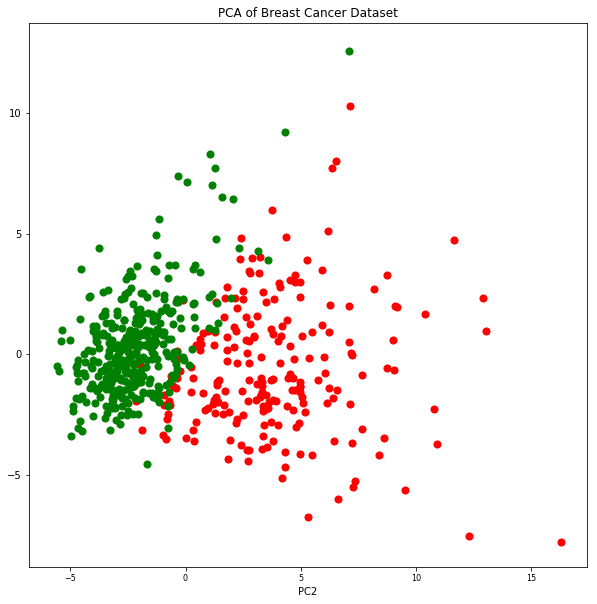

In [14]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=8)
plt.yticks(fontsize=10)
plt.xlabel('PC1',fontsize=10)
plt.xlabel('PC2',fontsize=10)
plt.title("PCA of Breast Cancer Dataset",fontsize=12)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df['label'] == target
    plt.scatter(principal_df.loc[indicesToKeep, 'PC1']
               , principal_df.loc[indicesToKeep, 'PC2'], c = color, s = 50)